Info about datatypes in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None

Number of missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


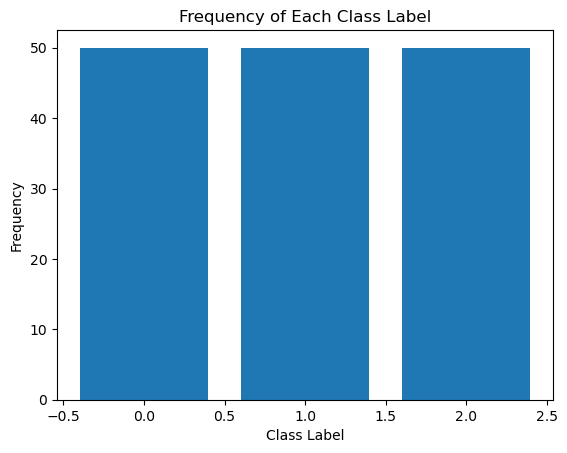

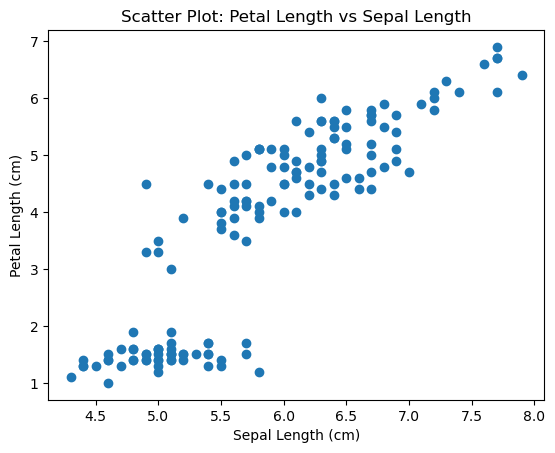

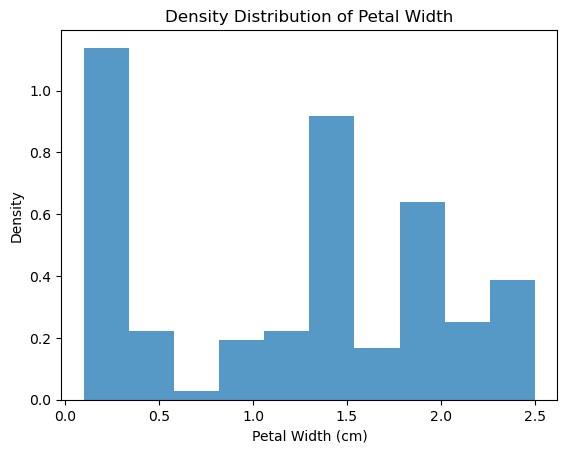

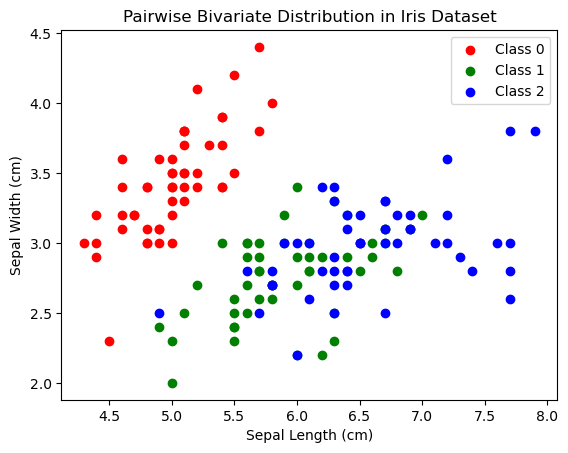

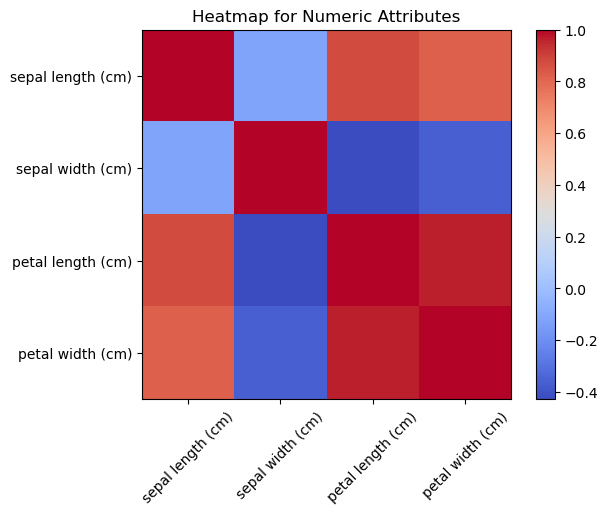


Descriptive Statistics and Confidence Intervals for Numeric Features:
                       mean  mode  median       std  standard_error  \
sepal length (cm)  5.843333   5.0    5.80  0.828066        0.067611   
sepal width (cm)   3.057333   3.0    3.00  0.435866        0.035588   
petal length (cm)  3.758000   1.4    4.35  1.765298        0.144136   
petal width (cm)   1.199333   0.2    1.30  0.762238        0.062236   
0                       NaN   NaN     NaN       NaN             NaN   

                   sepal length (cm)_lower  sepal length (cm)_upper  \
sepal length (cm)                      NaN                      NaN   
sepal width (cm)                       NaN                      NaN   
petal length (cm)                      NaN                      NaN   
petal width (cm)                       NaN                      NaN   
0                                 5.709732                 5.976934   

                   sepal width (cm)_lower  sepal width (cm)_upper  \
sepal 

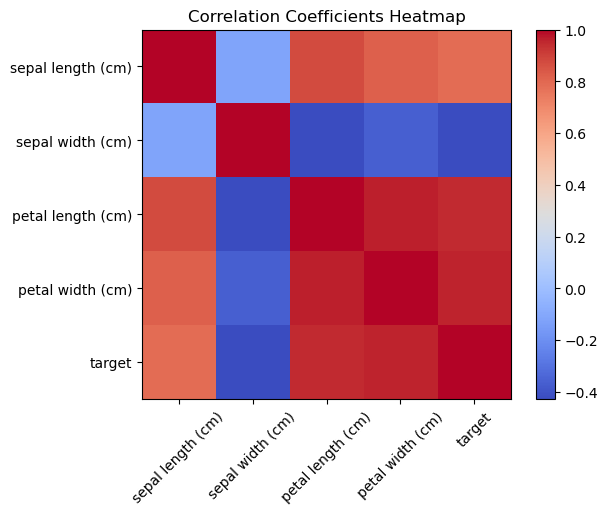

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import t
# a. Load data into Pandas’ data frame. Use the pandas.info() method to look at the info on datatypes in the dataset.
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
print("Info about datatypes in the dataset:")
print(df.info())
# b. Find the number of missing values in each column
missing_values = df.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values)
# c. Plot bar chart to show the frequency of each class label
class_frequency = df['target'].value_counts()
plt.bar(class_frequency.index, class_frequency.values)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class Label')
plt.show()
# d. Draw a scatter plot for Petal Length vs Sepal Length and fit a regression line
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot: Petal Length vs Sepal Length')
plt.show()
# e. Plot density distribution for feature Petal width
plt.hist(df['petal width (cm)'], density=True, alpha=0.75)
plt.xlabel('Petal Width (cm)')
plt.ylabel('Density')
plt.title('Density Distribution of Petal Width')
plt.show()
# f. Use a pair plot to show pairwise bivariate distribution in the Iris Dataset.
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df['target'] == i]['sepal length (cm)'],
                df[df['target'] == i]['sepal width (cm)'],
                label=f'Class {i}', c=colors[i])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Pairwise Bivariate Distribution in Iris Dataset')
plt.legend()
plt.show()
# g. Draw heatmap for any two numeric attributes
numeric_attributes = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
numeric_attributes_subset = df[numeric_attributes]
correlation_matrix = numeric_attributes_subset.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numeric_attributes)), numeric_attributes, rotation=45)
plt.yticks(range(len(numeric_attributes)), numeric_attributes)
plt.title('Heatmap for Numeric Attributes')
plt.show()
# h. Compute mean, mode, median, standard deviation, confidence interval and standard error for each numeric feature

iris = load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
numeric_attributes = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
numeric_stats = pd.DataFrame({
    'mean': iris_data[numeric_attributes].mean(),
    'mode': iris_data[numeric_attributes].mode().iloc[0],  # Mode may have multiple values
    'median': iris_data[numeric_attributes].median(),
    'std': iris_data[numeric_attributes].std(),
})
standard_error = iris_data[numeric_attributes].sem()
numeric_stats['standard_error'] = standard_error
confidence_level = 0.95
confidence_interval = pd.DataFrame()

for attribute in numeric_attributes:
    mean = numeric_stats.loc[attribute, 'mean']
    std_error = numeric_stats.loc[attribute, 'standard_error']
    df = len(iris_data[attribute]) - 1  # degrees of freedom
    t_value = t.ppf((1 + confidence_level) / 2, df)
    margin_of_error = t_value * std_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    confidence_interval[attribute + '_lower'] = [lower_bound]
    confidence_interval[attribute + '_upper'] = [upper_bound]
numeric_stats = pd.concat([numeric_stats, confidence_interval], axis=1)

# Print the results
print("\nDescriptive Statistics and Confidence Intervals for Numeric Features:")
print(numeric_stats)
# i. Compute correlation coefficients between each pair of features and plot heatmap
correlation_coefficients = iris_data.corr()
plt.imshow(correlation_coefficients, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(iris_data.columns)), iris_data.columns, rotation=45)
plt.yticks(range(len(iris_data.columns)), iris_data.columns)
plt.title('Correlation Coefficients Heatmap')
plt.show()

